# Self-Organising Maps

In [1]:
from matplotlib import pyplot as plt
from matplotlib import patches as patches
from evaluation_metrics import neighborhood_preservation_trustworthiness

import matplotlib.lines as mlines
import pandas as pd
import numpy as np

# reading data
data = pd.read_csv("cash-crops-nepal.csv")
# visualize some data
data.iloc[:10,:]

,Year AD,Year BS,Crop,Area,Production,Yield
0,1984/85,2041/42,OILSEED,127820,84030,657
1,1985/86,2042/43,OILSEED,137920,78390,568
2,1986/87,2043/44,OILSEED,142890,82500,577
3,1987/88,2044/45,OILSEED,151490,94370,623
4,1988/89,2045/46,OILSEED,154860,99190,641
5,1989/90,2046/47,OILSEED,153660,98060,638
6,1990/91,2047/48,OILSEED,156310,92140,589
7,1991/92,2048/49,OILSEED,154570,87840,568
8,1992/93,2049/50,OILSEED,165240,93690,567
9,1993/94,2050/51,OILSEED,177486,107535,606


In [2]:
data.shape

(105, 6)

In [3]:
# What are the different crops
print(data.iloc[:,2].unique())

['OILSEED' 'POTATO' 'TOBACCO' 'SUGARCANE' 'JUTE']


We will not use "Crop" labels for training SOM. But we will use it to check if the clustering by SOM worked fine or not. We will also drop the “Year AD” and “Year BS” columns.

In [4]:
# shuffling data
agri_data = data.iloc[np.random.permutation(len(data))]
trunc_data = agri_data[["Area", "Production", "Yield"]]
trunc_data.iloc[:10,:]

,Area,Production,Yield
76,48800,1762580,36118
46,7300,5380,737
80,59477,2247990,37796
93,9000,11000,1222
74,44820,1568700,35000
26,83350,671810,8060
86,19840,23452,1182
25,81570,640910,7857
68,31500,988300,31375
57,4283,3809,889


In [5]:
# (custom choice for) normalizing data
trunc_data = trunc_data / trunc_data.max()
trunc_data.iloc[:10,:]

,Area,Production,Yield
76,0.256263,0.741794,0.898078
46,0.038334,0.002264,0.018326
80,0.312332,0.946083,0.939802
93,0.047262,0.004629,0.030385
74,0.235363,0.660199,0.870279
26,0.437696,0.282736,0.200413
86,0.104186,0.009870,0.029391
25,0.428349,0.269732,0.195365
68,0.165416,0.415933,0.780143
57,0.022491,0.001603,0.022105


## Training SOM

Now let’s train the data in a 3 x 3 SOM network using 3 input features. 

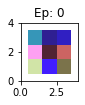

In [6]:
from our_som1 import SOM

# som = SOM(x_size, y_size, num_features)
agri_som = SOM(3,3,3)

# Initial weights
init_fig = plt.figure()
agri_som.show_plot(init_fig, 1, 0)
plt.show()

Random weights (3 features) are given to each of 9 (3×3) neurons. The above figure shows how the neural network looks like in the beginning.

In [7]:
agri_som.train(trunc_data.values,num_epochs=200,init_learning_rate=0.01)

ValueError: num must be 1 <= num <= 10, not 1.0

<Figure size 432x288 with 0 Axes>

Notice: 

- after 60 Epochs, the network changed from random colors (initialization) to nearly constant color; this means that initial neighbourhood is large, so each neuron’s weight are being adjusted according to data.

- Slowly, the network develops different color according to input data structures/patterns, but, you can notice similar colors are neighbors to one another.

- Since there was a random initialization, the positions of colors may change but the topology will be preserved.

## Prediction and Analysis

In [8]:
def predict(df):
    bmu, bmu_idx = agri_som.find_bmu(df.values)
    df['bmu'] = bmu
    df['bmu_idx'] = bmu_idx
    return df
clustered_df = trunc_data.apply(predict, axis=1)
clustered_df.iloc[0:10]

,Area,Production,Yield,bmu,bmu_idx
76,0.256263,0.741794,0.898078,"[[0.5397493516389381, 0.38536827294935133, 0.3...","[0, 0]"
46,0.038334,0.002264,0.018326,"[[0.2972101524342114, 0.059672360641057264, 0....","[2, 2]"
80,0.312332,0.946083,0.939802,"[[0.5397493516389381, 0.38536827294935133, 0.3...","[0, 0]"
93,0.047262,0.004629,0.030385,"[[0.2972101524342114, 0.059672360641057264, 0....","[2, 2]"
74,0.235363,0.660199,0.870279,"[[0.5397493516389381, 0.38536827294935133, 0.3...","[0, 0]"
26,0.437696,0.282736,0.200413,"[[0.40044840062089126, 0.23875511613977157, 0....","[1, 0]"
86,0.104186,0.009870,0.029391,"[[0.2972101524342114, 0.059672360641057264, 0....","[2, 2]"
25,0.428349,0.269732,0.195365,"[[0.40044840062089126, 0.23875511613977157, 0....","[1, 0]"
68,0.165416,0.415933,0.780143,"[[0.21412242154525113, 0.26164707938900783, 0....","[0, 2]"
57,0.022491,0.001603,0.022105,"[[0.2972101524342114, 0.059672360641057264, 0....","[2, 2]"


Now, joininig the labelled initial data

In [9]:
joined_df = agri_data.join(clustered_df, rsuffix="_norm")
joined_df[0:10]

,Year AD,Year BS,Crop,Area,Production,Yield,Area_norm,Production_norm,Yield_norm,bmu,bmu_idx
76,1997/98,2054/55,SUGARCANE,48800,1762580,36118,0.256263,0.741794,0.898078,"[[0.5397493516389381, 0.38536827294935133, 0.3...","[0, 0]"
46,1988/89,2045/46,TOBACCO,7300,5380,737,0.038334,0.002264,0.018326,"[[0.2972101524342114, 0.059672360641057264, 0....","[2, 2]"
80,2001/2002,2058/59,SUGARCANE,59477,2247990,37796,0.312332,0.946083,0.939802,"[[0.5397493516389381, 0.38536827294935133, 0.3...","[0, 0]"
93,1993/94,2050/51,JUTE,9000,11000,1222,0.047262,0.004629,0.030385,"[[0.2972101524342114, 0.059672360641057264, 0....","[2, 2]"
74,1995/96,2052/53,SUGARCANE,44820,1568700,35000,0.235363,0.660199,0.870279,"[[0.5397493516389381, 0.38536827294935133, 0.3...","[0, 0]"
26,1989/90,2046/47,POTATO,83350,671810,8060,0.437696,0.282736,0.200413,"[[0.40044840062089126, 0.23875511613977157, 0....","[1, 0]"
86,1986/87,2043/44,JUTE,19840,23452,1182,0.104186,0.009870,0.029391,"[[0.2972101524342114, 0.059672360641057264, 0....","[2, 2]"
25,1988/89,2045/46,POTATO,81570,640910,7857,0.428349,0.269732,0.195365,"[[0.40044840062089126, 0.23875511613977157, 0....","[1, 0]"
68,1989/90,2046/47,SUGARCANE,31500,988300,31375,0.165416,0.415933,0.780143,"[[0.21412242154525113, 0.26164707938900783, 0....","[0, 2]"
57,1999/2000,2056/57,TOBACCO,4283,3809,889,0.022491,0.001603,0.022105,"[[0.2972101524342114, 0.059672360641057264, 0....","[2, 2]"


Visualize how the original data gets clustered in the SOM

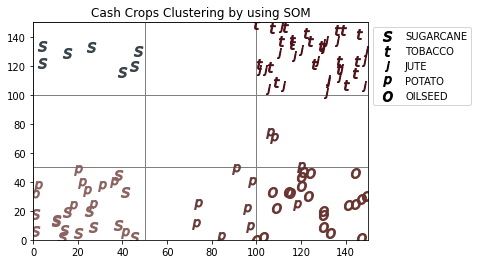

In [10]:
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import matplotlib.lines as mlines

fig = plt.figure()
# setup axes
ax = fig.add_subplot(111)
scale = 50
ax.set_xlim((0, agri_som.net.shape[0]*scale))
ax.set_ylim((0, agri_som.net.shape[1]*scale))
ax.set_title("Cash Crops Clustering by using SOM")

for x in range(0, agri_som.net.shape[0]):
    for y in range(0, agri_som.net.shape[1]):
        ax.add_patch(patches.Rectangle((x*scale, y*scale), scale, scale,
                     facecolor='white',
                     edgecolor='grey'))
legend_map = {}
        
for index, row in joined_df.iterrows():
    x_cor = row['bmu_idx'][0] * scale
    y_cor = row['bmu_idx'][1] * scale
    x_cor = np.random.randint(x_cor, x_cor + scale)
    y_cor = np.random.randint(y_cor, y_cor + scale)
    color = row['bmu'][0]
    marker = "$\\ " + row['Crop'][0]+"$"
    marker = marker.lower()
    ax.plot(x_cor, y_cor, color=color, marker=marker, markersize=10)
    label = row['Crop']
    if not label in legend_map:
        legend_map[label] =  mlines.Line2D([], [], color='black', marker=marker, linestyle='None',
                          markersize=10, label=label)
plt.legend(handles=list(legend_map.values()), bbox_to_anchor=(1, 1))
plt.show()

In [11]:
dataT = trunc_data[data['Crop']=='TOBACCO']
print(dataT)

        Area  Production     Yield
46  0.038334    0.002264  0.018326
57  0.022491    0.001603  0.022105
62  0.015770    0.001269  0.024965
56  0.023221    0.001646  0.021981
53  0.032190    0.002319  0.022354
58  0.022192    0.001672  0.023373
50  0.034974    0.002534  0.022478
44  0.046316    0.002058  0.013775
61  0.017844    0.001393  0.024219
47  0.039962    0.002778  0.021558
49  0.034238    0.002527  0.022901
52  0.031655    0.002292  0.022478
48  0.038282    0.002938  0.023796
55  0.025579    0.001618  0.019619
42  0.044899    0.002706  0.018699
43  0.045581    0.001970  0.013402
59  0.020023    0.001584  0.024542
51  0.035404    0.002619  0.022950
45  0.033976    0.001877  0.017132
60  0.018889    0.001456  0.023920
54  0.029775    0.001885  0.019643


/tmp/ipykernel_37163/2686195632.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataT = trunc_data[data['Crop']=='TOBACCO']


In [12]:
print(dataT.max())

Area          0.046316
Production    0.002938
Yield         0.024965
dtype: float64


In [13]:
dataT = trunc_data[data['Crop']=='JUTE']
print(dataT.min())

Area          0.047262
Production    0.004209
Yield         0.025959
dtype: float64


/tmp/ipykernel_37163/3067265762.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataT = trunc_data[data['Crop']=='JUTE']


In [14]:
print(dataT.mean())

Area          0.077544
Production    0.007860
Yield         0.031578
dtype: float64


In [15]:
trunc_data

,Area,Production,Yield
76,0.256263,0.741794,0.898078
46,0.038334,0.002264,0.018326
80,0.312332,0.946083,0.939802
93,0.047262,0.004629,0.030385
74,0.235363,0.660199,0.870279
...,...,...,...
31,0.512706,0.353071,0.213666
99,0.076328,0.006387,0.025959
11,0.971491,0.048815,0.015590
40,0.751078,0.691619,0.285700


In [16]:
cd = pd.DataFrame(clustered_df['bmu'].apply(lambda x: x[0].tolist()), index = trunc_data.index)
cd = cd.bmu.apply(list).apply(pd.Series).astype(float)
cd

,0,1,2
76,0.539749,0.385368,0.374970
46,0.297210,0.059672,0.081307
80,0.539749,0.385368,0.374970
93,0.297210,0.059672,0.081307
74,0.539749,0.385368,0.374970
...,...,...,...
31,0.400448,0.238755,0.233033
99,0.297210,0.059672,0.081307
11,0.410285,0.203759,0.183094
40,0.539749,0.385368,0.374970


In [17]:
neighborhood_preservation_trustworthiness(1, trunc_data, cd)

(0.9323162274618585, 0.8264376811547511)